In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

### Metrics ###
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# read car dataset
data = pd.read_csv('car.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
#Value count for each of columns to check the distributions
for col in data.columns:
    print('Column: '+col)
    print(data[col].value_counts(),'\n')

Column: buying
med      432
low      432
high     432
vhigh    432
Name: buying, dtype: int64 

Column: maint
med      432
low      432
high     432
vhigh    432
Name: maint, dtype: int64 

Column: doors
3        432
4        432
5more    432
2        432
Name: doors, dtype: int64 

Column: persons
more    576
4       576
2       576
Name: persons, dtype: int64 

Column: lug_boot
med      576
small    576
big      576
Name: lug_boot, dtype: int64 

Column: safety
med     576
low     576
high    576
Name: safety, dtype: int64 

Column: class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [4]:
# create dictionary of ordinal to integer mapping
ord_1 = {'low':1, 
            'med':2, 
            'high':3, 
            'vhigh':4}

ord_class = {'unacc':1, 
            'acc':2, 
            'good':3, 
            'vgood':4}

ord_boot = {'small':1, 
            'med':2, 
            'big':3}

ord_persons = {'2':1, 
                '4':2, 
                'more':3} 

ord_doors = {'2':1, 
            '3':2, 
            '4':3, 
            '5more':4}

data['buying'] = data.buying.map(ord_1)
data['maint'] = data.maint.map(ord_1)
data['doors'] = data.doors.map(ord_doors)
data['persons'] = data.persons.map(ord_persons)
data['lug_boot'] = data.lug_boot.map(ord_boot)
data['safety'] = data.safety.map(ord_1)
data['class'] = data['class'].map(ord_class)

In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


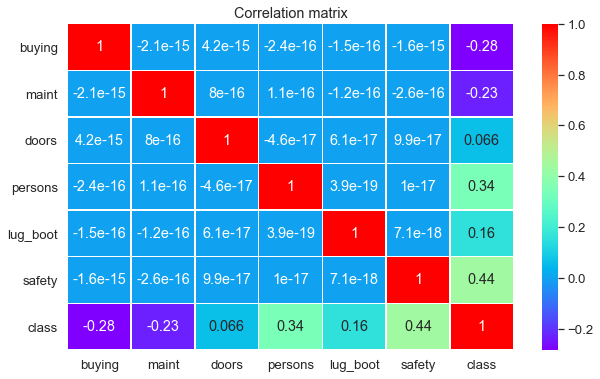

In [6]:
#Print correlation matrix to check correlation among variables
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True, cmap='rainbow',linewidth=0.5)
plt.title('Correlation matrix');

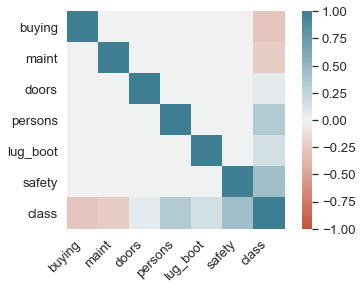

In [7]:
# Another correlation plots
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
#Typical train test split and training
X = data[['class', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y= data['buying']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# make a single prediction
#Maintenance = High Number of doors = 4 Lug Boot Size = Big Safety = High Class Value = Good
row = [[3,3,3,2,3,3]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 1


Automatically created module for IPython interactive environment


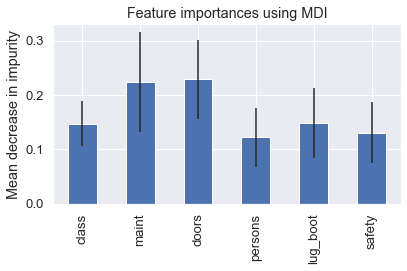

In [10]:
#Print feature importance by mean decrease in impurity

print(__doc__)

importances = model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in model.estimators_], axis=0)

feature_names = ['class', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [11]:
tr_pred=model.predict(X_test)

# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test, tr_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, tr_pred))

# Explained variance score: 1 is perfect prediction.
print('Accuracy: %.3f' % model.score(X_test, y_test))

'''
Mean squared error (MSE): 2.283
Mean absolute error (MAE): 1.320
Accuracy: 0.075
'''

Mean squared error (MSE): 2.397
Mean absolute error (MAE): 1.349
Accuracy: 0.075


'\nMean squared error (MSE): 2.283\nMean absolute error (MAE): 1.320\nAccuracy: 0.075\n'

In [12]:
#Training with 10 fold CV
model = RandomForestClassifier()
# 10 fold CV
kf10 = KFold(n_splits=10, shuffle=True)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf10)
# report performance

print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[0.06936416 0.06936416 0.0867052  0.05780347 0.05202312 0.05780347
 0.0867052  0.05780347 0.08139535 0.06395349]


TypeError: 'numpy.ndarray' object is not callable